In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')


%matplotlib inline

---

# Data
[MNIST](http://yann.lecun.com/exdb/mnist/) database of handwritten digits

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f8cd5110278>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f8cacb4f518>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f8cd406c710>)

In [4]:
len(mnist.test.images), len(mnist.test.images[0]), len(mnist.test.labels)

(10000, 784, 10000)

In [5]:
len(mnist.train.images), len(mnist.validation.images), len(mnist.test.images)

(55000, 5000, 10000)

In [6]:
# 28x28 image
isize = len(mnist.test.images[0])
isize

784

In [7]:
val_labels = np.argmax(mnist.validation.labels, axis=1)

In [8]:
val_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [9]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [10]:
osize = len(mnist.test.labels[0])
osize

10

---

# Network

Example of simple, tiny neural network

In [11]:
# hidden layer size
hsize = 30

# weights and biases
w1 = tf.Variable(tf.random_normal((isize, hsize), stddev=0.1))
b1 = tf.Variable(tf.random_normal((hsize,), stddev=0.1))
w2 = tf.Variable(tf.random_normal((hsize, osize), stddev=0.1))
b2 = tf.Variable(tf.random_normal((osize,), stddev=0.1))

# placeholders for inputs and targets 
x = tf.placeholder(tf.float32, shape=[None, isize])
t = tf.placeholder(tf.float32, shape=[None, osize])

# single hidden layer 
h = tf.nn.sigmoid(tf.matmul(x, w1) + b1)

# output layer activations
a = tf.matmul(h, w2) + b2

# objective
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(a, t))

optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

predict = tf.argmax(tf.nn.softmax(a), dimension=1)

In [12]:
tr_rate = []
val_rate = []
test_rate = 0.0

with tf.Session() as session:
    session.run(tf.initialize_all_variables())
    for i in range(10000):
        images, labels = mnist.train.next_batch(100)
        session.run(train, feed_dict={x: images, t: labels})
        if i % 50 == 0:
            tr_target = np.argmax(labels, axis=1)
            tr_predicions = session.run(predict, feed_dict={x: images, t: labels})
            tr_rate.append(np.mean(tr_target == tr_predicions))
            
            val_predicions = session.run(predict, feed_dict={x: mnist.validation.images,
                                                             t: mnist.validation.labels})
            val_rate.append(np.mean(val_labels == val_predicions))
    test_predicions = session.run(predict, feed_dict={x: mnist.test.images, t: mnist.test.labels})
    test_rate = (np.mean(val_labels == val_predicions))

0.94679999999999997

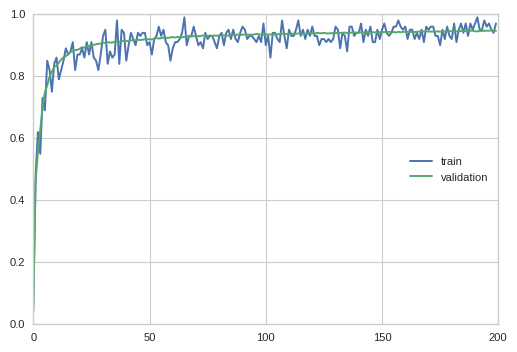

In [13]:
plt.plot(tr_rate, label='train')
plt.plot(val_rate, label='validation')
plt.legend(loc=5)
test_rate